## Import libraries

In [28]:
# generic tools
import numpy as np
import datetime 

# tools from sklearn
from sklearn.preprocessing import LabelBinarizer # used to binarize
from sklearn.metrics import classification_report # used to get classification report
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # stochastic gradient descent
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

# Load the TensorBoard notebook extension
#%load_ext tensorboard
# delete logs from previous runs - not always safe!
#!rm -rf ./logs/

## Download data, train-test split, binarize labels

We are using the mnist_784 dataset, which is a dataset of handwritten digits images. 

In [29]:
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# Normalize data 
data = data.astype("float")/255.0

# Create training and test split of data
(trainX, testX, trainY, testY) = train_test_split(data, 
                                                  labels, 
                                                  test_size=0.2)

# convert labels to one-hot encoding
lb = LabelBinarizer() # binarize labels
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

## Define neural network architecture using ```tf.keras```

We are using ```keras```. When we craete a model with keras we start by initizialing it, and then we add layers one by one. 

In [30]:
# define architecture 784x256x128x10

# Initialize sequential model (feed-forward model)
model = Sequential() 

# Adding an input layer to the model with 784 and then add hidden layer with 256 nodes. This layer is "dense" which refers to a fully-connected layer. It has 256 nodes. 
model.add(Dense(256, input_shape=(784,), activation="sigmoid")) 

# Add hidden layer with 128 nodes. 
model.add(Dense(128, activation="sigmoid"))

# Add third layer with 10 nodes (this is the output layer). This time the activation function is "softmax" which is a generalization of logistic regression classifier for multiclass problems. Hence, when we want classification outputs with tf.keras we can use softmax. Softmax returns a percentage value of the likelihood that the data belongs to any of the classes (e.g. if you have 10 classes, softmax returns 10 percentage values.)
model.add(Dense(10, activation="softmax")) # generalisation of logistic regression for multiclass task

NB! We have not added a bias explicitly, but these bias terms are added behind the scenes.

## Show summary of model architecture

In [31]:
# With keras we can get some nice outputs to inspect the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


^Here we get an overview of the model we have defined. In this summary we can get an overview of the different layers in the model. We can also see the number of trainable parameters at each layer. This number decreases as we go through the network. We can also see the total number of trainable parameters for the full network. These parameters are what the model uses to make its predictions.

## Visualise model layers

This kind of visualization is nice to show how the network is structured.

In [62]:
plot_model(model, show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Compile model loss function, optimizer, and preferred metrics

Now that we have defined the model, we need to define the range of hyperparameters used for training and learning:

- Learning rate: telling how far the model should go forward - how far it is allowed to step. This value impacts the training rate - lower values means that the model takes a longer time to train/converge. If the value is too high, the model will never converge. 
- Loss function
- Optimizer
- Metrics to evaluate the model

In [33]:
# train model using SGD
sgd = SGD(0.01) # defining the learning rate. 
model.compile(loss="categorical_crossentropy", # defining the loss function
              optimizer=sgd, # we are using stochastic gradient descent for optimization
              metrics=["accuracy"]) # we are using accuracy to evaulate the performance of the model

## Set ```tensorboard``` parameters - not compulsory!

The cell below does not work on worker02. 

In [34]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1)

^Above we are creating a folder with fiels that have the date and time (year, month, day, hour, minute, second) to save outputs from the model as it is being trained.

## Train model and save history

Now we need to fit the model. 

In [35]:
history = model.fit(trainX, trainY, 
                    validation_data=(testX,testY), 
                    epochs=100, 
                    batch_size=128,
                    callbacks=[tensorboard_callback])

Epoch 1/100
438/438 [==============================] - 5s 9ms/step - loss: 2.3066 - accuracy: 0.1315 - val_loss: 2.2407 - val_accuracy: 0.2558
Epoch 2/100
438/438 [==============================] - 3s 7ms/step - loss: 2.2260 - accuracy: 0.3493 - val_loss: 2.1711 - val_accuracy: 0.5094
Epoch 3/100
438/438 [==============================] - 3s 7ms/step - loss: 2.1523 - accuracy: 0.5006 - val_loss: 2.0761 - val_accuracy: 0.6160
Epoch 4/100
438/438 [==============================] - 3s 8ms/step - loss: 2.0476 - accuracy: 0.5776 - val_loss: 1.9400 - val_accuracy: 0.6105
Epoch 5/100
438/438 [==============================] - 3s 8ms/step - loss: 1.9013 - accuracy: 0.6264 - val_loss: 1.7584 - val_accuracy: 0.6696
Epoch 6/100
438/438 [==============================] - 3s 7ms/step - loss: 1.7126 - accuracy: 0.6604 - val_loss: 1.5551 - val_accuracy: 0.6991
Epoch 7/100
438/438 [==============================] - 3s 7ms/step - loss: 1.5131 - accuracy: 0.6982 - val_loss: 1.3624 - val_accuracy: 0.7280

Epoch 58/100
438/438 [==============================] - 3s 6ms/step - loss: 0.3167 - accuracy: 0.9096 - val_loss: 0.3354 - val_accuracy: 0.9026
Epoch 59/100
438/438 [==============================] - 3s 7ms/step - loss: 0.3162 - accuracy: 0.9098 - val_loss: 0.3337 - val_accuracy: 0.9028
Epoch 60/100
438/438 [==============================] - 3s 7ms/step - loss: 0.3161 - accuracy: 0.9090 - val_loss: 0.3323 - val_accuracy: 0.9034
Epoch 61/100
438/438 [==============================] - 3s 7ms/step - loss: 0.3153 - accuracy: 0.9083 - val_loss: 0.3308 - val_accuracy: 0.9034
Epoch 62/100
438/438 [==============================] - 3s 6ms/step - loss: 0.3173 - accuracy: 0.9082 - val_loss: 0.3293 - val_accuracy: 0.9034
Epoch 63/100
438/438 [==============================] - 3s 6ms/step - loss: 0.3106 - accuracy: 0.9109 - val_loss: 0.3282 - val_accuracy: 0.9035
Epoch 64/100
438/438 [==============================] - 3s 7ms/step - loss: 0.3111 - accuracy: 0.9111 - val_loss: 0.3266 - val_accuracy:

As the model is training we get information about its training. We see information for each epoch. Once the model has trained we get an accuracy score. We can inspect the model using matplotlib below.

## Visualise using ```matplotlib```

Below we are visualing the model with matplotlib to see how it performs.

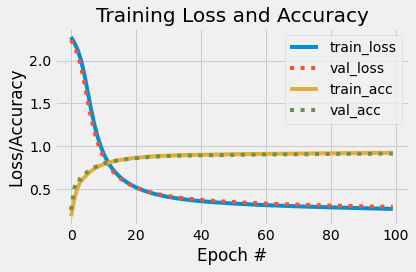

In [36]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 100), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

We can see the training loss and accuracy in the plot. Based on the two curves, we can see how the model performs. We can see that as the number of epochs increases, the loss decreases which is good, and the accuracy increases, which is also good.

__Underfitting:__ when the curves (train_loss and train_acc) are close to each other.

__Overfitting:__ when there is a large gap between the curves (train_loss and train_acc)

Using matplotlib for visualizing model accuracy is not that nice - instead we can use tensorboard, which is much better. 

## Inspect using ```tensorboard```

This won't run on JupyterHub!

These kind of metrics are useful when thinking about how to optimize the model further. TensorFlow is great at showing us how we can actually optimize the model.

In [37]:
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
ModuleNotFoundError: No module named 'tensorboard'

With this visualization we can see how the model performs as the number of epochs increases. Loss starts off high, and slowly but surely the loss decreases, until it reaches a stable point. 

We also get a computational graph made by TensorFlow.
When ticking "TPU compatibility" we can see which points of the computational graph could actually be performed using TPUs - these are the points where the model could be improved. 

We can also inspect the range of possible values for the weights that the model is creating for each epoch. 

## Classifier metrics

Below we are taking the model and predicting the labels for the test data. 

In [38]:
# Evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128) # predict the test data with the trained model
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1381
           1       0.94      0.96      0.95      1571
           2       0.92      0.89      0.91      1370
           3       0.90      0.89      0.89      1463
           4       0.90      0.93      0.92      1395
           5       0.88      0.85      0.87      1198
           6       0.95      0.94      0.95      1421
           7       0.94      0.93      0.94      1484
           8       0.88      0.88      0.88      1334
           9       0.89      0.88      0.89      1383

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.92      0.91     14000



The model performs well. It performs slightly better than the logistic regression classifier. This model has been trained on the full MNIST dataset, which contains 56000 datapoints each of which are 784 features (pixels). The efficiency of this model is incredible! It is very quick!

In [44]:
# Inspecting predictions
predictions[0]

array([5.06873592e-04, 3.89010020e-05, 2.75253667e-03, 9.94722843e-01,
       9.75453052e-09, 6.57273515e-04, 5.45245541e-07, 1.26747834e-03,
       2.96685284e-05, 2.38022330e-05])

In [46]:
# Converting to floats
np.set_printoptions(suppress=True)
predictions[0]

array([0.00050687, 0.0000389 , 0.00275254, 0.99472284, 0.00000001,
       0.00065727, 0.00000055, 0.00126748, 0.00002967, 0.0000238 ],
      dtype=float32)

This is an array of values. These are the percentages for each class. The class with the highest percentage is the the most likely class. Hence, we have 10 percentage values - one for each class. The class with the highest percentage value is the model's best guess of what the test data is. 

__Using ReLU instead of sigmoid__

We can take the same model, and we can change the activation function from sigmoid to ReLU, and see whether the model performs better. Remember, that by avoiding the use of the sigmoid function, we avoid the problem of dissapearing gradients. 

__Results__: When using the ReLU as the activation function, the accuracy increases greatly. 
Most importantly, the model no longer has problems with predicting any single digits. It might even be performing a bit too well. It is approaching nearly 100& accuracy for each digit. There is a great increase in performance compared to the logistic regression classification, which is why keras and TensorFlow are so great tools! 

__Take Home Message__
- Training neural network models is challenging computaionally and conceptually. Beyond toy datasets, the models become very complex and hard to train and refine in a way that makes them useful. 
- From now on we are going to use TensorFlow to build and train neural networks models. TensorFlow works with computational graphs and tensors, which allows TensorFlow to train neural networks in very efficient ways and these neural networks can be distributed easily
- Using TensorFlow with keras allows us to build models which can be modified and changed in easy ways by just changing parameters in the model (e.g. the activation function).  
- TensorFlow also allows us to see how well the model performs and how it learns in real-time. 

# Train a Neural Network Model on the CIFAR-10 Dataset

__Download data, train-test split, binarize labels__

In [60]:
# Load data
((trainX, trainY), (testX, testY)) = tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [63]:
# Scale/normalize data (going from having a range of 0-256 values to having values between 0 and 1)
trainX.astype("float")/255.0
testX.astype("float")/255.0

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [64]:
# Binarize labels
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

__Define neural network architecture using ```tf.keras```__

In [89]:
# Define architecture 1024x256x128x10
model = Sequential()
model.add(Dense(256, input_shape=(1024, 3), activation="relu")) # input layer + first hidden layer
model.add(Dense(128, activation="relu")) # second hidden layer
model.add(Dense(10, activation="softmax")) # output layer

__Show summary of model architecture__

In [90]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1024, 256)         1024      
_________________________________________________________________
dense_32 (Dense)             (None, 1024, 128)         32896     
_________________________________________________________________
dense_33 (Dense)             (None, 1024, 10)          1290      
Total params: 35,210
Trainable params: 35,210
Non-trainable params: 0
_________________________________________________________________


__Visualise model layers__

In [67]:
plot_model(model, show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


__Compile model loss function, optimizer, and preferred metrics__

In [78]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd, 
              metrics=["accuracy"])

__Train model and save history__

In [79]:
history = model.fit(trainX, trainY, 
                    validation_data=(testX,testY), 
                    epochs=100, 
                    batch_size=128)

Epoch 1/100


ValueError: in user code:

    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/cds-au617836/cds-visual-forked/cv101/lib/python3.6/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10) and (None, 32, 32, 10) are incompatible


__Visualize using tensorboard__

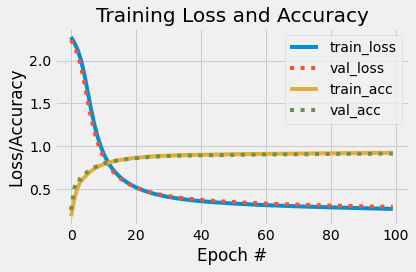

In [80]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 100), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

__Classifier metrics__

In [81]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...


ValueError: Classification metrics can't handle a mix of multiclass and unknown targets